# Reconocimiento de dígitos con redes neuronales convolucionales

- Ruben Rondón
- Maria Fernanda Quintero
- Maria Alejandra Marín

## Instalación de dependencias


In [ ]:
#Lo Convertirmos a tensorflow.js
!pip install tensorflowjs # instalamos tensorflowjs
# SE INSTALA DESDE EL INICIO PARA EVITAR PROBLEMAS POR REINICIO DEL ENTORNO

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

## Carga del conjunto de datos

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

#Cargar los datos de MNIST
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Tamaño conjunto de entrenameinto
len(X_entrenamiento)

60000

In [ ]:
#Tamaño conjunto de prueba
len(X_pruebas)

10000

## Preprocesamiento de los datos

In [ ]:
#Colocar los datos en la forma (1, 28, 28, 1)
X_entrenamiento = X_entrenamiento.reshape(-1, 28, 28, 1)
X_pruebas = X_pruebas.reshape(-1, 28, 28, 1)

#Hacer 'one-hot encoding' de los resultados seran 10 neuronas donde solo el resultado correcto sera 1 y el resto 0)
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

#Convertir a float y normalizar
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

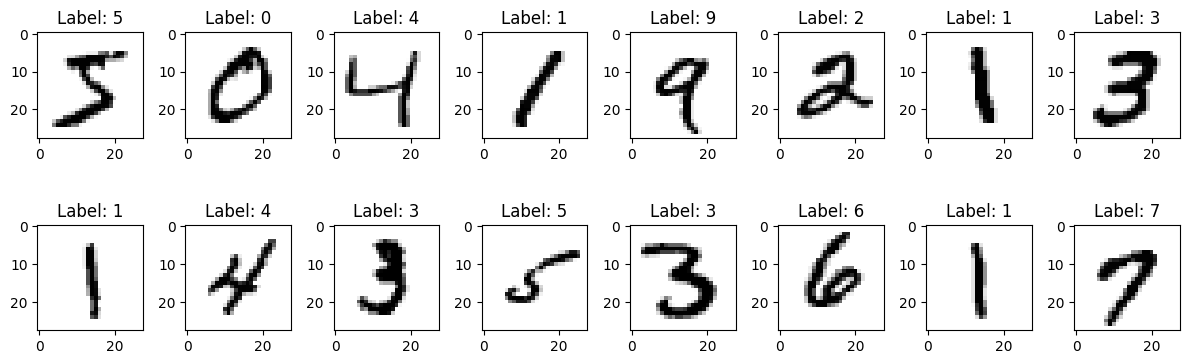

In [ ]:
#Mostramos imagenes del set
import matplotlib.pyplot as plt
filas = 2
columnas = 8
num = filas*columnas
imagenes = X_entrenamiento[0:num]
etiquetas = Y_entrenamiento[0:num]
fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes[i//columnas, i%columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

In [ ]:
# Data Augmentation con ImageDataGenerator de keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
rango_inclinacion=15
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    shear_range=rango_inclinacion
)

datagen.fit(X_entrenamiento)

ANTES:



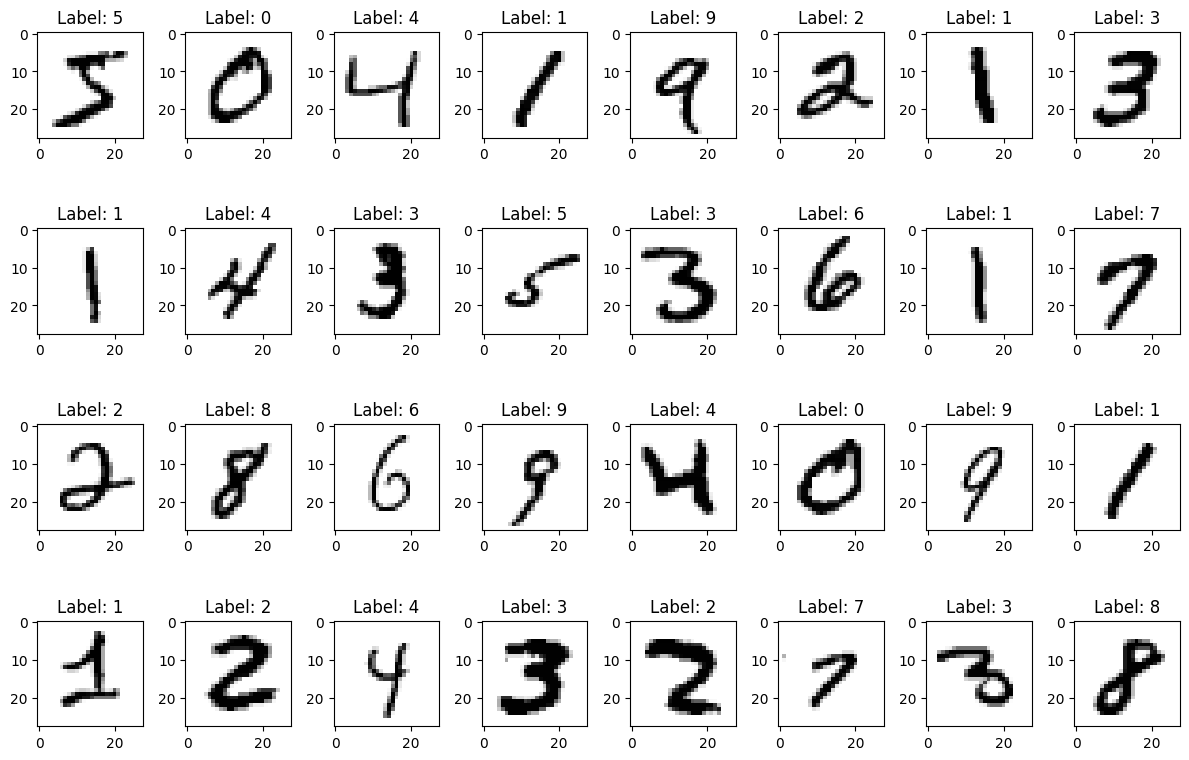

DESPUES:



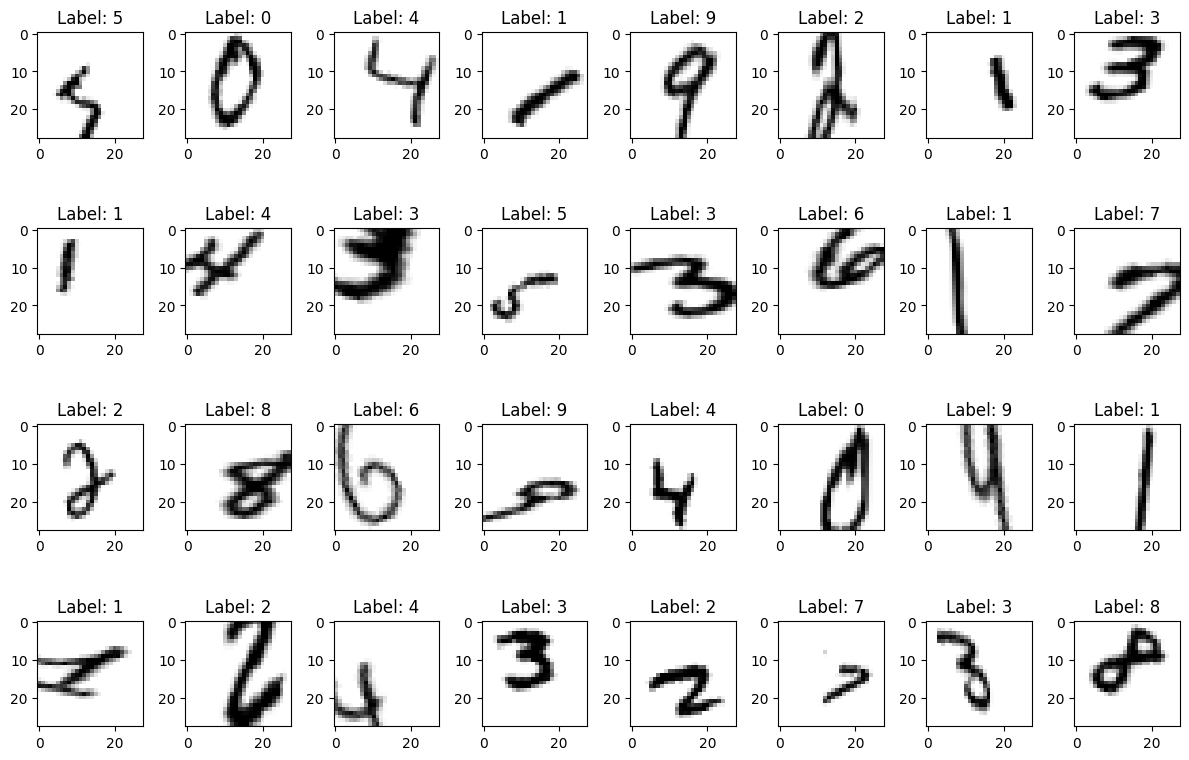

In [ ]:
#Mostramos imagenes del set [antes y despues de las transformaciones]
filas = 4
columnas = 8
num = filas*columnas
print('ANTES:\n')
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes1[i//columnas, i%columnas]
     ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))
plt.tight_layout()
plt.show()
print('DESPUES:\n')
fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for X, Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//columnas, i%columnas]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
     break
plt.tight_layout()
plt.show()

## Arquitectura y compilación del modelo

In [ ]:
# Definición del modelo con InputLayer definido
modelo = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),  # InputLayer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
#Los datos para entrenar saldran de "datagen", de manera que sean generados con las transformaciones indicadas
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [ ]:
augmented_data, augmented_labels = next(datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32))
print(augmented_data.shape, augmented_labels.shape)


(32, 28, 28, 1) (32, 10)


### Inspección de la salida del datagen

In [ ]:
#Nos aseguramos de que no hayan valores nulos y que las etiquetas sean validas
for i in range(5):
    batch_data, batch_labels = next(datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32))
    print(f"Batch {i+1}: Data Range: {batch_data.min()} to {batch_data.max()}, Label Sum: {batch_labels.sum()}")


Batch 1: Data Range: 0.0 to 1.0, Label Sum: 32.0
Batch 2: Data Range: 0.0 to 1.0, Label Sum: 32.0
Batch 3: Data Range: 0.0 to 1.0, Label Sum: 32.0
Batch 4: Data Range: 0.0 to 1.0, Label Sum: 32.0
Batch 5: Data Range: 0.0 to 1.0, Label Sum: 32.0


In [ ]:
print("Y_pruebas Example:", Y_pruebas[0])

Y_pruebas Example: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
batch_data, batch_labels = next(datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32))
print("Batch Data Range:", batch_data.min(), "to", batch_data.max())
print("Batch Labels:", batch_labels[:5])  # Print the first few labels


Batch Data Range: 0.0 to 1.0
Batch Labels: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


## Entrenamiento

In [ ]:
# ENTRENAMIENTO DEL MODELO
TAMANO_LOTE = 32
print("Entrenando modelo...");
epocas=60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas)
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.2158 - loss: 2.1443 - val_accuracy: 0.8373 - val_loss: 0.7709
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.4860 - loss: 1.5365 - val_accuracy: 0.9079 - val_loss: 0.4902
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.5784 - loss: 1.3034 - val_accuracy: 0.9321 - val_loss: 0.3521
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.6307 - loss: 1.1521 - val_accuracy: 0.9451 - val_loss: 0.2767
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.6698 - loss: 1.0457 - val_accuracy: 0.9434 - val_loss: 0.2582
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6980 - loss: 0.9584 - val_accuracy: 0.9472 - val_loss: 0.2354
Epoch 7/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7193 - loss: 0.9005 - val_accuracy: 0.9545 - val_loss: 0.1949
Epoch 8/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7301 - loss: 0.84

In [ ]:
# Exportar el modelo en formato SavedModel
modelo.export('carpeta_salida_modelo')
modelo.save('numeros_conv_ad_do.h5')

Saved artifact at 'carpeta_salida_modelo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  140194395688624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140194394562176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140194394766352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140194394762304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140194397693280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140194397689584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140194397690464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140194397690816: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model carpeta_salida_modelo modelo_tfjs

2024-11-27 04:22:40.686396: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732681360.706396    9776 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732681360.712519    9776 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2024-11-27 04:22:43.729876: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1732681363.730050    9776 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [ ]:
!ls modelo_tfjs

group1-shard1of1.bin  model.json


## Evaluación del modelo

Precisión en el conjunto de prueba: 98.01%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


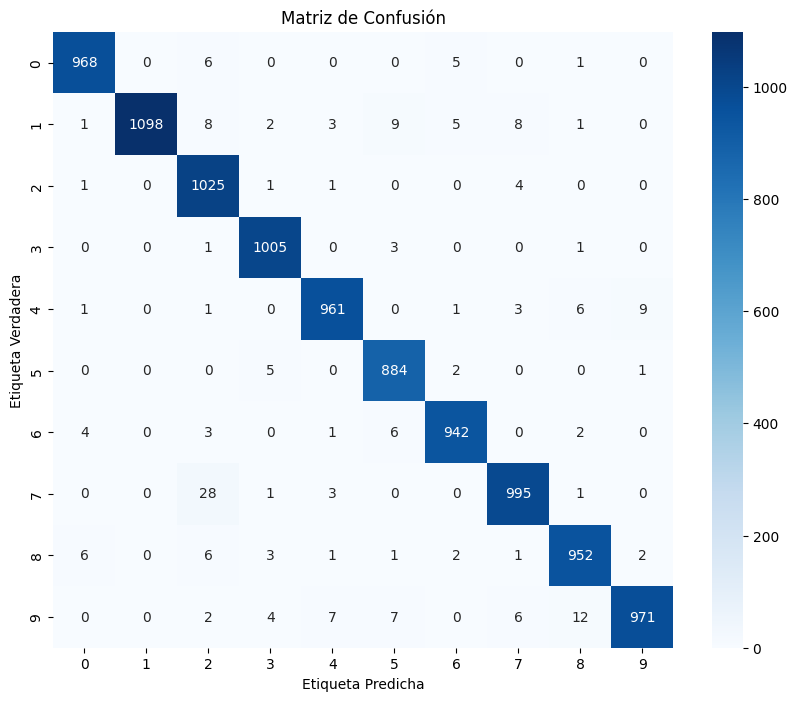

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.97      0.98      1135
           2       0.95      0.99      0.97      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



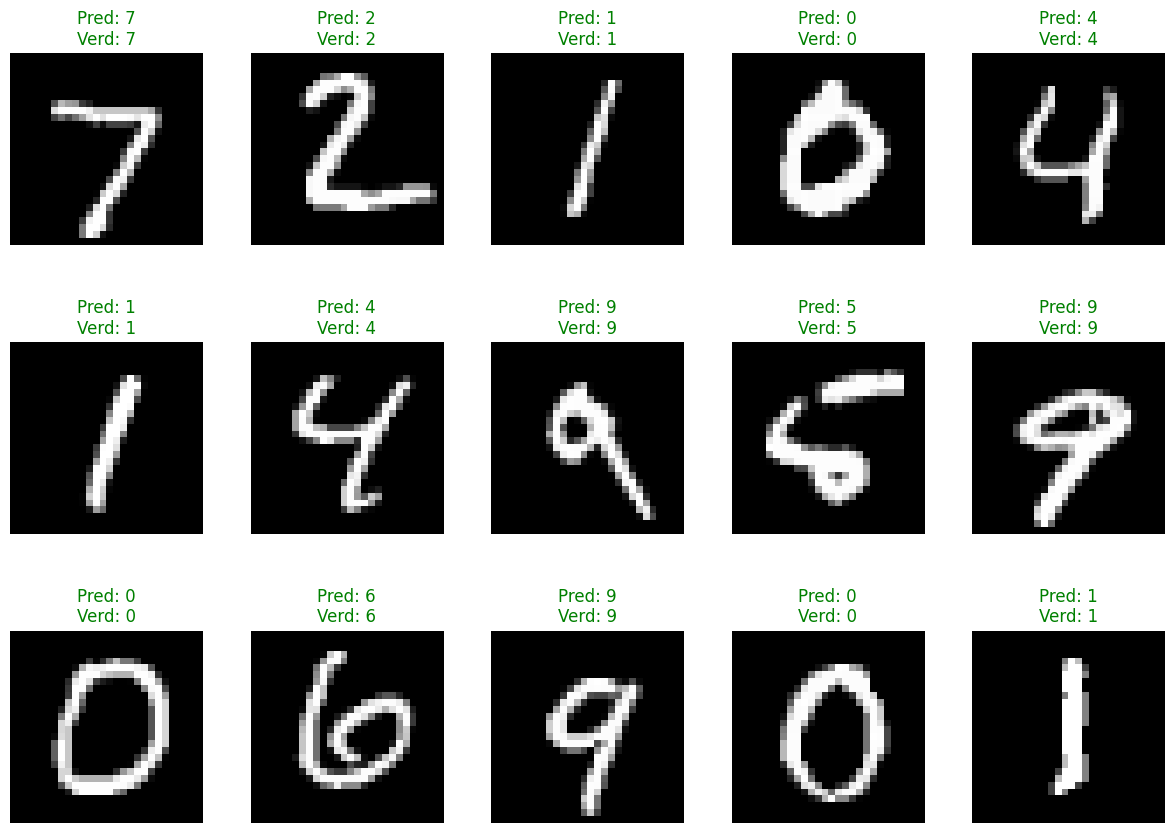

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Cargar el conjunto de datos de MNIST
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = tf.keras.datasets.mnist.load_data()

# Preprocesar los datos
X_pruebas = X_pruebas.reshape((X_pruebas.shape[0], 28, 28, 1)).astype('float32') / 255

# Convertir las etiquetas a one-hot encoding
Y_pruebas = tf.keras.utils.to_categorical(Y_pruebas, 10)

# Cargar el modelo entrenado
modelo = tf.keras.models.load_model('numeros_conv_ad_do.h5')

# Evaluar el rendimiento en el conjunto de prueba
score = modelo.evaluate(X_pruebas, Y_pruebas, verbose=0)
print(f"Precisión en el conjunto de prueba: {score[1] * 100:.2f}%")

# Predicciones en el conjunto de prueba
Y_predicciones = modelo.predict(X_pruebas)
Y_predicciones_clases = np.argmax(Y_predicciones, axis=1)
Y_pruebas_clases = np.argmax(Y_pruebas, axis=1)

# Matriz de confusión
conf_matrix = confusion_matrix(Y_pruebas_clases, Y_predicciones_clases)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Reporte de clasificación
reporte = classification_report(Y_pruebas_clases, Y_predicciones_clases, target_names=[str(i) for i in range(10)])
print("Reporte de Clasificación:")
print(reporte)

# Gráfica de algunas predicciones para visualizar los resultados
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.ravel()

for i in np.arange(15):
    imagen = X_pruebas[i].reshape(28, 28)
    prediccion = Y_predicciones_clases[i]
    verdadero = Y_pruebas_clases[i]
    color = 'green' if prediccion == verdadero else 'red'

    axes[i].imshow(imagen, cmap='gray')
    axes[i].set_title(f'Pred: {prediccion}\nVerd: {verdadero}', color=color)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()


vemos que se generaron 2 archivos:

- group1-shard1of1.bin
- model.json



### Gráficos de entrenamiento

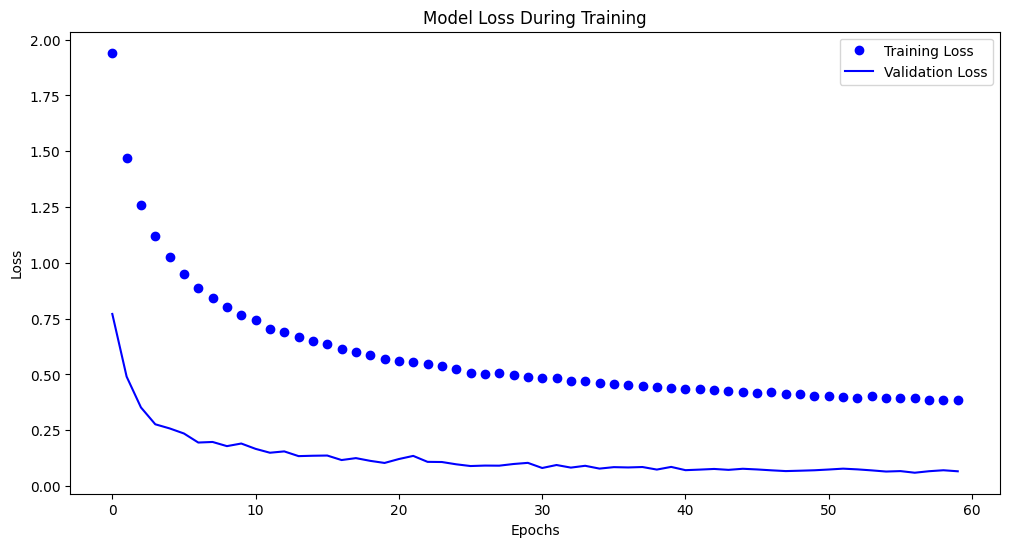

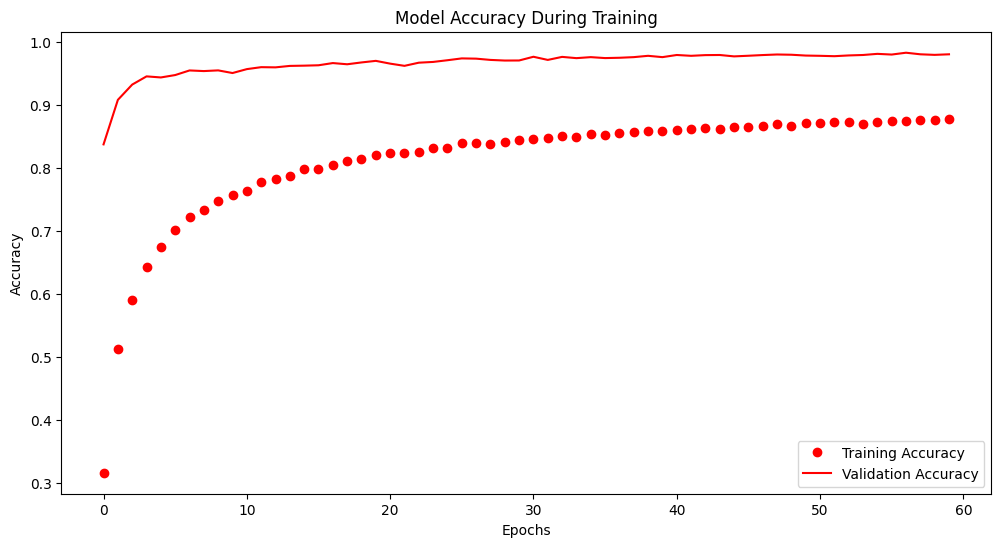

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
history_data = history.history

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_data['loss'],'bo', label='Training Loss')
plt.plot(history_data['val_loss'], 'b', label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy (if available)
if 'accuracy' in history_data and 'val_accuracy' in history_data:
    plt.figure(figsize=(12, 6))
    plt.plot(history_data['accuracy'], 'ro' ,label='Training Accuracy')
    plt.plot(history_data['val_accuracy'], 'r', label='Validation Accuracy')
    plt.title('Model Accuracy During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
